In [47]:
import pandas as pd
import numpy as np
from scipy.sparse.linalg import svds
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
BT = pd.read_csv('book_tags.csv') #BOOK_TAGS
B = pd.read_csv('books.csv') #BOOKS
R = pd.read_csv('ratings.csv') #Rating
T = pd.read_csv('tags.csv') #Tags
TR = pd.read_csv('to_read.csv') #To_read

In [49]:
BT.info

<bound method DataFrame.info of         goodreads_book_id  tag_id   count
0                       1   30574  167697
1                       1   11305   37174
2                       1   11557   34173
3                       1    8717   12986
4                       1   33114   12716
...                   ...     ...     ...
999907           33288638   21303       7
999908           33288638   17271       7
999909           33288638    1126       7
999910           33288638   11478       7
999911           33288638   27939       7

[999912 rows x 3 columns]>

In [50]:
BT.head(10)

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716
5,1,11743,9954
6,1,14017,7169
7,1,5207,6221
8,1,22743,4974
9,1,32989,4364


In [51]:
BT.tail(10)

,goodreads_book_id,tag_id,count
999902,33288638,28528,7
999903,33288638,2132,7
999904,33288638,17080,7
999905,33288638,29299,7
999906,33288638,2101,7
999907,33288638,21303,7
999908,33288638,17271,7
999909,33288638,1126,7
999910,33288638,11478,7
999911,33288638,27939,7


In [52]:
BT.isna().sum()

goodreads_book_id    0
tag_id               0
count                0
dtype: int64

In [53]:
BT['count'].unique()

array([167697,  37174,  34173, ...,  34617,   5858,  14116], dtype=int64)

In [54]:
B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [55]:
B.isna().sum()

book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

In [56]:
R.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   book_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 136.8 MB


In [57]:
R.describe()

,user_id,book_id,rating
count,5.976479e+06,5.976479e+06,5.976479e+06
mean,2.622446e+04,2.006477e+03,3.919866e+00
std,1.541323e+04,2.468499e+03,9.910868e-01
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.281300e+04,1.980000e+02,3.000000e+00
50%,2.593800e+04,8.850000e+02,4.000000e+00
75%,3.950900e+04,2.973000e+03,5.000000e+00
max,5.342400e+04,1.000000e+04,5.000000e+00


In [58]:
R.head(10)

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
5,2,26,4
6,2,315,3
7,2,33,4
8,2,301,5
9,2,2686,5


In [59]:
R.isna().sum()

user_id    0
book_id    0
rating     0
dtype: int64

In [60]:
T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tag_id    34252 non-null  int64 
 1   tag_name  34252 non-null  object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB


In [61]:
T.describe()

,tag_id
count,34252.000000
mean,17125.500000
std,9887.845047
min,0.000000
25%,8562.750000
50%,17125.500000
75%,25688.250000
max,34251.000000


In [62]:
T.head(10)

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-
5,5,--166-
6,6,--17-
7,7,--19-
8,8,--2-
9,9,--258-


In [63]:
T.isna().sum()

tag_id      0
tag_name    0
dtype: int64

In [64]:
TR.describe()

,user_id,book_id
count,912705.000000,912705.000000
mean,27668.980115,2454.739538
std,14775.096388,2626.359921
min,1.000000,1.000000
25%,15507.000000,360.000000
50%,27799.000000,1381.000000
75%,40220.000000,3843.000000
max,53424.000000,10000.000000


In [65]:
TR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  912705 non-null  int64
 1   book_id  912705 non-null  int64
dtypes: int64(2)
memory usage: 13.9 MB


In [66]:
TR.isna().sum()

user_id    0
book_id    0
dtype: int64

BOOK_TAGS, RATINGS, TAGS, TO_READ has no NULL values 
BOOKS has NULL values which we need to fix 

In [67]:
B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [68]:
B.isna().sum()

book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

In [69]:
B.head(20)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,...,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
7,8,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,...,2044241,2120637,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...
8,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000.0,Angels & Demons,...,2001311,2078754,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...


In [70]:
B = B.drop('image_url', axis=1)

In [71]:
B = B.drop('small_image_url', axis=1)

In [72]:
B.head(10)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,eng,4.26,2346404,2478609,140739,47994,92723,327550,698471,1311871
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,...,en-US,4.25,2071616,2196809,37653,46023,76784,288649,665635,1119718
7,8,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,...,eng,3.79,2044241,2120637,44920,109383,185520,455042,661516,709176
8,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000.0,Angels & Demons,...,en-CA,3.85,2001311,2078754,25112,77841,145740,458429,716569,680175
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,eng,4.24,2035490,2191465,49152,54700,86485,284852,609755,1155673


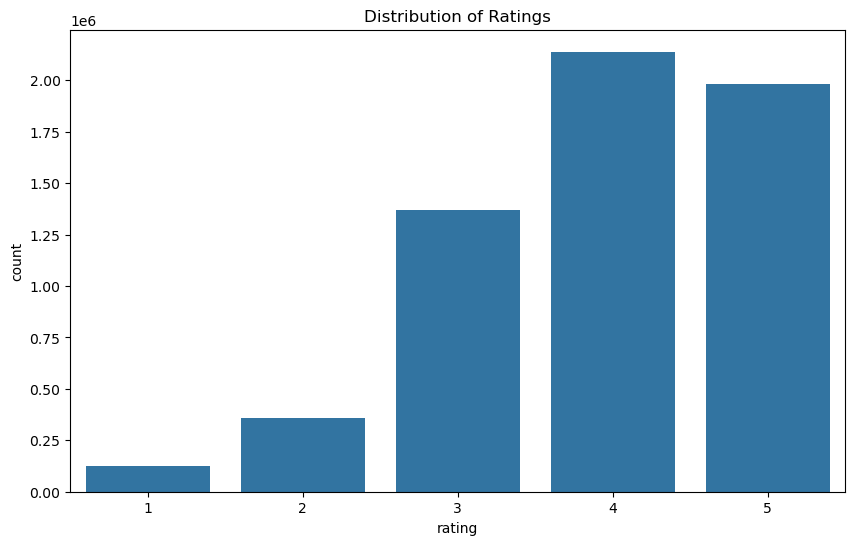


Rating Statistics:
count    5.976479e+06
mean     3.919866e+00
std      9.910868e-01
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


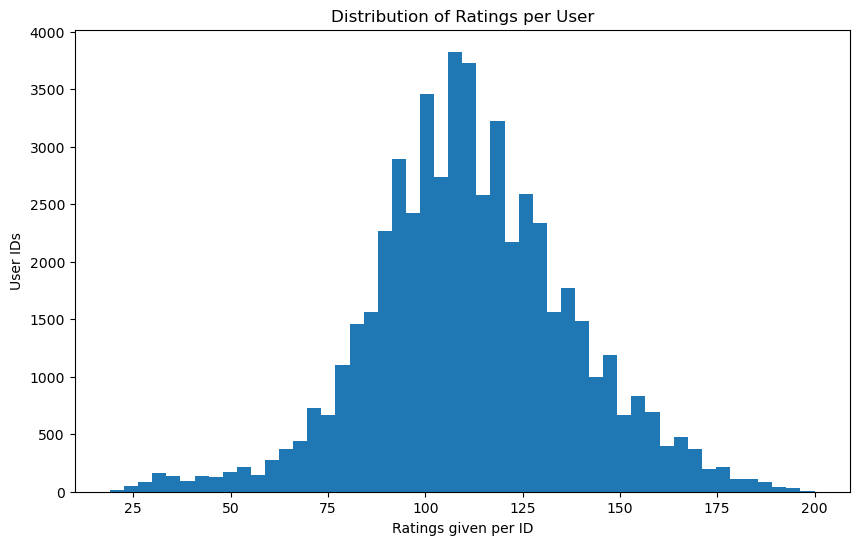

In [77]:

plt.figure(figsize=(10, 6))
sns.countplot(data=R, x='rating')
plt.title('Distribution of Ratings')
plt.show()


print("\nRating Statistics:")
print(R['rating'].describe())


user_ratings_count = R['user_id'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(user_ratings_count, bins=50)
plt.title('Distribution of Ratings per User')
plt.xlabel('Ratings given per ID')
plt.ylabel('User IDs')
plt.show()

In [75]:
def create_matrix(R, min_book_ratings=10, min_user_ratings=5):
    
    user_book_matrix = R.pivot(
        index='user_id',
        columns='book_id',
        values='rating'
    )
    
    
    user_ratings_count = user_book_matrix.notna().sum(axis=1)
    book_ratings_count = user_book_matrix.notna().sum(axis=0)
    
    filtered_matrix = user_book_matrix[
        user_ratings_count >= min_user_ratings
    ].loc[:, book_ratings_count >= min_book_ratings]
    
    return filtered_matrix

matrix = create_matrix(R)
print("Matrix shape:", matrix.shape)
print("Sparsity: {:.2f}%".format(
    (1 - matrix.notna().sum().sum() / (matrix.shape[0] * matrix.shape[1])) * 100
))

Matrix shape: (53424, 9999)
Sparsity: 98.88%


In [90]:
# Cell 5: Corrected Matrix Factorization Implementation
class MatrixFactorizationRecommender:
    def _init_(self):
        self.n_factors = 50  # Set as default inside the class
        
    def fit(self, ratings_matrix):
        """
        Fit the model using SVD
        """
        # Store original matrix and convert to numpy array
        self.ratings_matrix = ratings_matrix
        matrix_values = ratings_matrix.values  # Convert to numpy array
        
        # Handle missing values
        self.mean_rating = np.nanmean(matrix_values)
        filled_matrix = np.nan_to_num(matrix_values, nan=self.mean_rating)
        
        # Normalize the data
        normalized_matrix = filled_matrix - self.mean_rating
        
        # Perform SVD
        U, sigma, Vt = svds(normalized_matrix, k=self.n_factors)
        
        # Convert sigma to diagonal matrix
        self.sigma = np.diag(sigma)
        
        # Store the decomposed matrices
        self.user_factors = U
        self.item_factors = Vt
        
        return self
    
    def predict(self, user_idx, item_idx):
        """
        Predict rating for a specific user-item pair
        """
        prediction = (
            self.mean_rating + 
            np.dot(
                np.dot(self.user_factors[user_idx, :], self.sigma),
                self.item_factors[:, item_idx]
            )
        )
        return np.clip(prediction, 1, 5)
    
    def recommend_items(self, user_idx, n_recommendations=5):
        """
        Recommend top N items for a user
        """
        # Get all predictions for this user
        user_predictions = (
            self.mean_rating + 
            np.dot(
                np.dot(self.user_factors[user_idx, :], self.sigma),
                self.item_factors
            )
        )
        
        # Get items the user hasn't rated
        user_rated = ~np.isnan(self.ratings_matrix.iloc[user_idx].values)
        unrated_items = np.where(~user_rated)[0]
        
        # Sort predictions for unrated items
        unrated_predictions = user_predictions[unrated_items]
        top_indices = unrated_items[np.argsort(unrated_predictions)[::-1][:n_recommendations]]
        
        return (
            self.ratings_matrix.columns[top_indices],
            user_predictions[top_indices]
        )

In [92]:
mf_model = MatrixFactorizationRecommender()
mf_model.fit(matrix)

print("Model trained successfully!")

# Test a recommendation
sample_user_idx = 0
book_ids, predicted_ratings = mf_model.recommend_items(sample_user_idx, n_recommendations=5)
print("\nSample recommendations for user 0:")
for book_id, rating in zip(book_ids, predicted_ratings):
    book_info = B[B['book_id'] == book_id].iloc[0]
    print(f"Title: {book_info['title']}")
    print(f"Predicted Rating: {rating:.2f}")
    print("---")

MemoryError: Unable to allocate 3.98 GiB for an array with shape (53424, 9999) and data type float64